# 40 Working with GPX Data in GemGIS

GPX, or GPS Exchange Format, is an XML schema designed as a common GPS data format for software applications. It can be used to describe waypoints, tracks, and routes. The format is open and can be used without the need to pay license fees. Location data (and optionally elevation, time, and other information) is stored in tags and can be interchanged between GPS devices and software. Common software applications for the data include viewing tracks projected onto various map sources, annotating maps, and geotagging photographs based on the time they were taken.

Source: https://en.wikipedia.org/wiki/GPS_Exchange_Format

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/40_working_with_gpx_data_in_gemgis/'

## Load Data

Data from a running practice in northern Germany is used for demonstration purposes.

In [2]:
import gemgis as gg
import geopandas as gpd

gpx = gg.vector.load_gpx(path=file_path+'Run.gpx', layer='tracks') 
gpx

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<open Collection 'C:\Users\ale93371\Documents\gemgis_data\data\40_working_with_gpx_data_in_gemgis\Run.gpx:tracks', mode 'r' at 0x1f73bf136d0>

## Inspecting the data

The driver used to open the data was ``GPX``

In [3]:
gpx.driver

'GPX'

The CRS of the data is ``EPGS:4326``.

In [4]:
gpx.crs

{'init': 'epsg:4326'}

In [5]:
gpx.crs_wkt

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

The extent of the data is defining the bounds of the gpx.

In [6]:
gpx.bounds

(8.460906, 52.694879, 8.501507, 52.732331)

Since the track has different start and end points, the track is not closed.

In [7]:
gpx.closed

False

Accessing the meta data.

In [8]:
gpx.meta

{'driver': 'GPX',
 'schema': {'properties': OrderedDict([('name', 'str'),
               ('cmt', 'str'),
               ('desc', 'str'),
               ('src', 'str'),
               ('link1_href', 'str'),
               ('link1_text', 'str'),
               ('link1_type', 'str'),
               ('link2_href', 'str'),
               ('link2_text', 'str'),
               ('link2_type', 'str'),
               ('number', 'int'),
               ('type', 'str')]),
  'geometry': 'MultiLineString'},
 'crs': {'init': 'epsg:4326'},
 'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'}

Name of the Track.

In [9]:
gpx.name

'tracks'

In [10]:
gpx.profile

{'driver': 'GPX',
 'schema': {'properties': OrderedDict([('name', 'str'),
               ('cmt', 'str'),
               ('desc', 'str'),
               ('src', 'str'),
               ('link1_href', 'str'),
               ('link1_text', 'str'),
               ('link1_type', 'str'),
               ('link2_href', 'str'),
               ('link2_text', 'str'),
               ('link2_type', 'str'),
               ('number', 'int'),
               ('type', 'str')]),
  'geometry': 'MultiLineString'},
 'crs': {'init': 'epsg:4326'},
 'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'}

## Loading GPX as dict

The GPX can also be loaded as dict for further processing of the contents of the GPX file using ``load_gpx_as_dict(..)``. This dict contains the properties, the geometry including the coordinates of the data, the ID and the type of the data

In [11]:
gpx_dict = gg.vector.load_gpx_as_dict(path=file_path+'Run.gpx', layer='tracks')
gpx_dict 

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('name',
               'First half marathon distance of the year'),
              ('cmt', None),
              ('desc', None),
              ('src', None),
              ('link1_href', None),
              ('link1_text', None),
              ('link1_type', None),
              ('link2_href', None),
              ('link2_text', None),
              ('link2_type', None),
              ('number', None),
              ('type', '9')]),
 'geometry': {'type': 'MultiLineString',
  'coordinates': [[(8.496285, 52.705566),
    (8.49627, 52.705593),
    (8.496234, 52.705629),
    (8.496205, 52.705664),
    (8.496181, 52.705705),
    (8.496171, 52.705754),
    (8.496183, 52.705798),
    (8.496233, 52.705828),
    (8.49627, 52.705869),
    (8.496244, 52.705919),
    (8.496214, 52.705943),
    (8.496178, 52.705963),
    (8.496139, 52.705984),
    (8.496101, 52.706001),
    (8.496064, 52.706018),
    (8.496028, 52.706036),
    (8.495994, 52.

In [12]:
gpx_dict.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [13]:
gpx_dict.items()

dict_items([('type', 'Feature'), ('id', '0'), ('properties', OrderedDict([('name', 'First half marathon distance of the year'), ('cmt', None), ('desc', None), ('src', None), ('link1_href', None), ('link1_text', None), ('link1_type', None), ('link2_href', None), ('link2_text', None), ('link2_type', None), ('number', None), ('type', '9')])), ('geometry', {'type': 'MultiLineString', 'coordinates': [[(8.496285, 52.705566), (8.49627, 52.705593), (8.496234, 52.705629), (8.496205, 52.705664), (8.496181, 52.705705), (8.496171, 52.705754), (8.496183, 52.705798), (8.496233, 52.705828), (8.49627, 52.705869), (8.496244, 52.705919), (8.496214, 52.705943), (8.496178, 52.705963), (8.496139, 52.705984), (8.496101, 52.706001), (8.496064, 52.706018), (8.496028, 52.706036), (8.495994, 52.706054), (8.495934, 52.706088), (8.495878, 52.706131), (8.495823, 52.706171), (8.495771, 52.706207), (8.495717, 52.706244), (8.495654, 52.706272), (8.495596, 52.706283), (8.495558, 52.706267), (8.495545, 52.706224), (8.4

In [14]:
gpx_dict['type'], gpx_dict['id'], gpx_dict['properties']

('Feature',
 '0',
 OrderedDict([('name', 'First half marathon distance of the year'),
              ('cmt', None),
              ('desc', None),
              ('src', None),
              ('link1_href', None),
              ('link1_text', None),
              ('link1_type', None),
              ('link2_href', None),
              ('link2_text', None),
              ('link2_type', None),
              ('number', None),
              ('type', '9')]))

In [15]:
gpx_dict['geometry']

{'type': 'MultiLineString',
 'coordinates': [[(8.496285, 52.705566),
   (8.49627, 52.705593),
   (8.496234, 52.705629),
   (8.496205, 52.705664),
   (8.496181, 52.705705),
   (8.496171, 52.705754),
   (8.496183, 52.705798),
   (8.496233, 52.705828),
   (8.49627, 52.705869),
   (8.496244, 52.705919),
   (8.496214, 52.705943),
   (8.496178, 52.705963),
   (8.496139, 52.705984),
   (8.496101, 52.706001),
   (8.496064, 52.706018),
   (8.496028, 52.706036),
   (8.495994, 52.706054),
   (8.495934, 52.706088),
   (8.495878, 52.706131),
   (8.495823, 52.706171),
   (8.495771, 52.706207),
   (8.495717, 52.706244),
   (8.495654, 52.706272),
   (8.495596, 52.706283),
   (8.495558, 52.706267),
   (8.495545, 52.706224),
   (8.495522, 52.706177),
   (8.495495, 52.706131),
   (8.495459, 52.706089),
   (8.495411, 52.706051),
   (8.495364, 52.706014),
   (8.49531, 52.705978),
   (8.495277, 52.705959),
   (8.495244, 52.70594),
   (8.495211, 52.705921),
   (8.495156, 52.705886),
   (8.495116, 52.705844),

In [16]:
gpx_dict['geometry']['type']

'MultiLineString'

In [17]:
gpx_dict['geometry']['coordinates']

[[(8.496285, 52.705566),
  (8.49627, 52.705593),
  (8.496234, 52.705629),
  (8.496205, 52.705664),
  (8.496181, 52.705705),
  (8.496171, 52.705754),
  (8.496183, 52.705798),
  (8.496233, 52.705828),
  (8.49627, 52.705869),
  (8.496244, 52.705919),
  (8.496214, 52.705943),
  (8.496178, 52.705963),
  (8.496139, 52.705984),
  (8.496101, 52.706001),
  (8.496064, 52.706018),
  (8.496028, 52.706036),
  (8.495994, 52.706054),
  (8.495934, 52.706088),
  (8.495878, 52.706131),
  (8.495823, 52.706171),
  (8.495771, 52.706207),
  (8.495717, 52.706244),
  (8.495654, 52.706272),
  (8.495596, 52.706283),
  (8.495558, 52.706267),
  (8.495545, 52.706224),
  (8.495522, 52.706177),
  (8.495495, 52.706131),
  (8.495459, 52.706089),
  (8.495411, 52.706051),
  (8.495364, 52.706014),
  (8.49531, 52.705978),
  (8.495277, 52.705959),
  (8.495244, 52.70594),
  (8.495211, 52.705921),
  (8.495156, 52.705886),
  (8.495116, 52.705844),
  (8.495069, 52.705803),
  (8.495022, 52.70577),
  (8.49499, 52.705741),
  (8.4

## Creating Shapely Base Geometry from GPX

In order to work with GPX data, a Shapely BaseGeometry can be created using ``load_gpx_as_geometry(...)``.


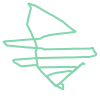

In [18]:
shape = gg.vector.load_gpx_as_geometry(path=file_path+'Run.gpx', layer='tracks')
shape

In [19]:
shape.wkt

'MULTILINESTRING ((8.496285 52.705566, 8.496270000000001 52.705593, 8.496233999999999 52.705629, 8.496205 52.705664, 8.496181 52.705705, 8.496171 52.705754, 8.496183 52.705798, 8.496233 52.705828, 8.496270000000001 52.705869, 8.496244000000001 52.705919, 8.496214 52.705943, 8.496178 52.705963, 8.496138999999999 52.705984, 8.496100999999999 52.706001, 8.496064000000001 52.706018, 8.496028000000001 52.706036, 8.495994 52.706054, 8.495934 52.706088, 8.495877999999999 52.706131, 8.495823 52.706171, 8.495771 52.706207, 8.495717000000001 52.706244, 8.495654 52.706272, 8.495596000000001 52.706283, 8.495558000000001 52.706267, 8.495545 52.706224, 8.495521999999999 52.706177, 8.495495 52.706131, 8.495459 52.706089, 8.495411000000001 52.706051, 8.495364 52.706014, 8.49531 52.705978, 8.495277 52.705959, 8.495244 52.70594, 8.495210999999999 52.705921, 8.495156 52.705886, 8.495115999999999 52.705844, 8.495069000000001 52.705803, 8.495022000000001 52.70577, 8.49499 52.705741, 8.494964 52.705709, 8.4

## Creating GeoData from Geometry

A GeoDataFrame containing the created geometry can easily be created. Notice that the CRS attribute of the GPX collection was provided. 

In [20]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=[shape], crs=gpx.crs)
gdf

,geometry
0,"MULTILINESTRING ((8.49629 52.70557, 8.49627 52..."


In [21]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

And the data can be plotted.

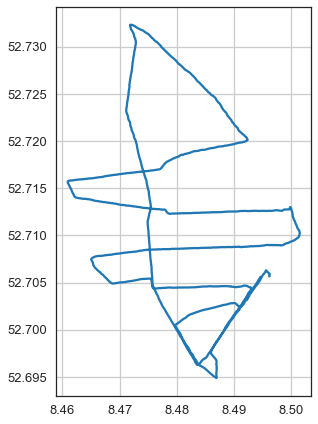

In [22]:
import matplotlib.pyplot as plt

gdf.plot()
plt.grid()

The length of the track is approximately 21139 m and therefore slightly longer than a half marathon distance (21097 m).

In [23]:
gdf.to_crs(4647).loc[0].geometry.length

21139.875974842333